<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Tutorial 03: Morphometrics<center>

<font size ="3"><font color='blue'>In this tutorial you will learn:
    
<font size ="3"><font color='blue'>- How to perform analysis on morphologies
    
<font size ="3"><font color='blue'>- How to plot some results

<font size ="3">There are two types of features: the neuron and neurite features.

<font size ="3">- Neurite features can be extracted from a single neurite, a list of neurites or a neuron.

<font size ="3">- Neuron features can only be extracted from a neuron, because some additional info is usually required (e.g. distance from soma).

In [3]:
# Make sure that all the plots will be shown
%matplotlib inline 

# import useful packages
import matplotlib.pyplot as plt
import neurom as nm

# Define the path in which the data file lives
#good_neuron = '..../good_morph.asc'
good_neuron = 'good_morph.asc'

neuron = nm.load_neuron(good_neuron)

/usr/local/lib/python3.6/dist-packages/neurom/io/neurolucida.py:266: UserWarning: This is an experimental reader. There are no guarantees regarding ability to parse Neurolucida .asc files or correctness of output.
  warnings.warn('This is an experimental reader. '


<font size ="3">All features can be called through the "neurom.get( )" function

In [4]:
help(nm.get)

Help on function get in module neurom.features:

get(feature, obj, **kwargs)
    Obtain a feature from a set of morphology objects
    
    Parameters:
        feature(string): feature to extract
        obj: a neuron, population or neurite tree
        **kwargs: parameters to forward to underlying worker functions
    
    Returns:
        features as a 1D or 2D numpy array.
    
        
    Features:        
        Neurite features (neurite, neuron, neuron population):
            - diameter_power_relation:
                Calculate the diameter power relation at a bifurcation point
                    as defined in https://www.ncbi.nlm.nih.gov/pubmed/18568015
                
                    This quantity gives an indication of how far the branching is from
                    the Rall ratio (when =1).
            - local_bifurcation_angles:
                Get a list of local bifurcation angles in a collection of neurites
            - neurite_lengths:
                Get the

<font size = "3">Now let's see how we can use it to make some measurements.

In [5]:
# Extract section_lengths
section_lengths_neuron = nm.get('section_lengths', neuron)
print ("Section lengths: \n", section_lengths_neuron[:10])

# Extract the local bifurcation angles
local_bif_angles = nm.get('local_bifurcation_angles', neuron)
print ("\nSection local bifurcation angles: \n", local_bif_angles[:10])

Section lengths: 
 [141.76908892  98.85629355  31.61597339 115.44071881 253.44653792
  58.12550396  13.54548668 146.05424249   3.42331406  18.24222293]

Section local bifurcation angles: 
 [0.55222467 1.77695708 1.5131931  1.09506469 1.41906447 1.29167013
 1.54406972 1.49584415 1.89702315 1.39986916]


In [6]:
try:
    # this must err because no soma is available
    nm.get('soma_radii', neuron.neurites)

except AttributeError:
    
    print ("Soma was not found. Input object is wrong.")


Soma was not found. Input object is wrong.


## Select Neurite Types

<font size ="3">The previous examples treated all neurites in the same way. NeuroM allows you to extract morphometrics for a selected type of trees.

In [7]:
dir(nm.NeuriteType)

['__class__',
 '__doc__',
 '__members__',
 '__module__',
 'all',
 'apical_dendrite',
 'axon',
 'basal_dendrite',
 'soma',
 'undefined']

In [8]:
import numpy as np

# Extract the section lengths of axonal trees
ax_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.axon)

# Extract the section lengths of basal dendritic trees
ba_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.basal_dendrite)

# Extract the section lengths of apical dendritic trees
ap_section_lengths = nm.get('section_lengths', neuron, neurite_type=nm.NeuriteType.apical_dendrite)

print ('axonal ', ax_section_lengths)
print ('\n basal  ', ba_section_lengths)
print ('\n apical ', ap_section_lengths)
print ('\n total_axonal_length =', np.sum(ax_section_lengths))

axonal  [141.76908892  98.85629355  31.61597339 115.44071881 253.44653792
  58.12550396  13.54548668 146.05424249   3.42331406  18.24222293
   4.65886252 259.93226633  13.67211891   5.34053368  17.28448551
  35.98858771  97.17781872  81.44749636  88.14854025   3.5445371
   8.33650379  52.19999947   6.99456634  76.80801827  11.12525252
   6.35604085   7.85215296  50.62044612 534.44833722 233.49807079
  99.07702607  63.39232701  39.36132431   9.58097756  91.95246137
  16.09330999  25.085838   230.02360403 118.66839688 164.58856538
 172.40604798   9.15511098 153.21583225  16.42576973  64.24651135
  38.20927809   8.76514574 307.70687408  32.50641804   4.90495611
  96.88991149   8.55463108  31.54400536   5.90119832 175.64076848
  24.25432657  46.55520044  13.48761908   8.00320499   5.47538965
   3.5233081   61.17165026  10.8611413    5.21184437   6.36354297
 188.43527385   6.07044734  19.14013586  20.89379455   8.15233213
  21.65269433   7.71498766  14.40249582  50.27586721  10.01913269
  4

## Let's plot the results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fea82069be0>)

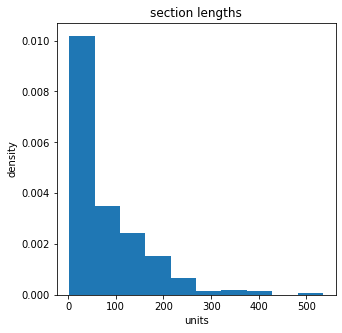

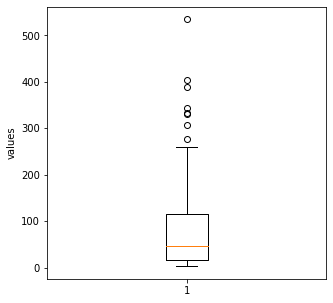

In [9]:
def histogram(data):
    """Generates a histogram in a new figure"""
    
    # Create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))
    
    # Create a histogram with specified bins and normalized
    ax.hist(data, bins=10, normed=True) 
    ax.set_title(feature.replace('_', ' ')) # Replace the underscores with spaces in the string
    ax.set_xlabel('units')
    ax.set_ylabel('density')
    
    return f, ax

def boxplot(data):
    '''Generates a boxplot in a new figure'''

    # Create an image with one subplot
    f, ax = plt.subplots(1,1, figsize=(5,5))
    ax.boxplot(data) # plot boxplot
    ax.set_ylabel('values')

    return f, ax

feature =  'section_lengths'
values = nm.get(feature, neuron)

histogram(values)
boxplot(values)